In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import gmaps
from scipy.stats import linregress



In [2]:
# Load the combined CSV file
combined_df = pd.read_csv("combined_csv.csv")

# Display sample data
combined_df

,Unnamed: 0,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,...,number_of_years_of_education,number_of_solar_system_per_household,housing_unit_median_value,household_count,solar_system_count_residential,total_panel_area_residential,daily_solar_radiation,electricity_price_residential,square_miles,pop_density
0,0,42,Pennsylvania,12794885,40.9,63627,35518,1480430,11.570483,2.745222,...,13.472963,0.001050,150700,4270226,8238,2.025491e+05,3.715775,13.64,46055.00,277.817501
1,1,6,California,39346023,36.7,78672,38576,4853434,12.335259,3.123769,...,13.409571,0.030414,362850,12542060,625476,1.576803e+07,5.128937,16.99,163696.00,240.360320
2,2,54,West Virginia,1807426,42.7,48037,27346,300152,16.606600,2.878735,...,12.860153,0.000000,95600,714719,499,1.122905e+04,3.786638,10.08,24038.00,75.190365
3,3,49,Utah,3151239,31.1,74197,30986,283360,8.992019,1.835119,...,13.952787,0.010257,208200,795526,11149,2.535065e+05,4.688451,10.88,84899.00,37.117504
4,4,36,New York,19514849,39.0,71117,40898,2581048,13.226072,2.923774,...,13.655858,0.001493,354650,6925678,52873,1.366822e+06,3.821709,18.54,54556.00,357.703076
5,5,11,District of Columbia,701974,34.1,90842,58659,103391,14.728608,4.172519,...,14.799600,0.006762,432800,240110,1833,4.590642e+04,3.984444,12.99,68.34,10271.788120
6,7,12,Florida,21216924,42.2,57703,32848,2772939,13.069468,2.621082,...,13.457360,0.006778,143100,7269480,140081,3.717083e+06,4.827880,11.58,65758.00,322.651601
7,8,45,South Carolina,5091517,39.7,54864,30727,726470,14.268243,2.660975,...,13.259044,0.001246,124900,1579901,4569,1.221164e+05,4.379648,12.57,32020.00,159.010525
8,9,38,North Dakota,760394,35.2,65315,36289,77491,10.190901,1.691360,...,13.599465,0.000357,126100,252332,273,5.715009e+03,3.735086,9.62,70705.00,10.754459
9,10,23,Maine,1340825,44.8,59489,33774,144384,10.768296,2.121231,...,13.692059,0.000000,167800,454650,457,9.935729e+03,3.601679,15.61,35385.00,37.892469


In [3]:
# q_low = combined_df["col"].quantile(.25)
# q_hi  = combined_df["col"].quantile(0.75)

# df_filtered = combined_df[(combined_df["col"] < q_hi) & (combined_df["col"] > q_low)]

The r-value is: 0.012757423326646426


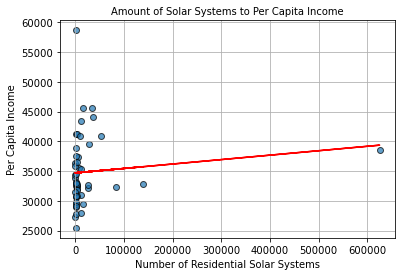

In [4]:
# Graph and linear regression on daily_solar_radiation.
x_values = combined_df["solar_system_count_residential"]
y_values = combined_df["Per Capita Income"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 4.15), fontsize = 10, color = "red")
plt.xlabel("Number of Residential Solar Systems")
plt.ylabel("Per Capita Income")
plt.title(f"Amount of Solar Systems to Per Capita Income", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
#plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_daily_solar_radiation.png")

# Show plot
plt.show()

In [5]:
#combined_df.sort_values(by=["Per Capita Income"], ascending=False)

The r-value is: 0.2912197566340232


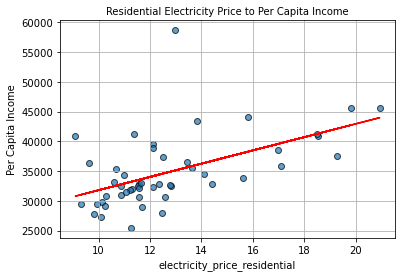

In [6]:
# Graph and linear regression on daily_solar_radiation.
x_values = combined_df["electricity_price_residential"]
y_values = combined_df["Per Capita Income"]

# Get linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Build linear regression plot
plt.scatter(x_values, y_values, alpha = 0.7, edgecolors = "k")
plt.plot(x_values, regress_values, "r")
plt.annotate(line_eq, (350000, 350000), fontsize = 10, color = "red")
plt.xlabel("electricity_price_residential")
plt.ylabel("Per Capita Income")
plt.title(f"Residential Electricity Price to Per Capita Income", fontsize = 10)
plt.grid(True)
print(f"The r-value is: {rvalue**2}") 

# Save linear regression plot as a png
#plt.savefig("output_data/RegressionPlot_solar_system_count_residential_vs_daily_solar_radiation.png")

# Show plot
plt.show()

There is a small (.1-.3) positive correlation between Per Capita Income vs Residential Electricity Price.

In [7]:
combined_df = pd.DataFrame(np.random.randn(100, 3))

import numpy as np
from scipy import stats
combined_df[(np.abs(stats.zscore(combined_df)) < 3).all(axis=1)]

,0,1,2
1,-0.676224,0.062829,-0.817636
2,0.573700,1.129926,1.597409
3,0.870792,-0.971462,-1.356735
4,0.158165,-0.325588,1.977802
5,0.529694,0.765448,0.956398
...,...,...,...
95,-0.813769,0.607023,-1.210280
96,0.860038,0.229091,0.408765
97,1.183819,0.621520,1.032358
98,0.597205,-1.428614,-0.537604


In [8]:
# For later use
Income_vs_Solar_Data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for name in Name:
    income_sol = combined_df.loc[combined_df["solar_system_count_residential"]==name, "Per Capita Income"]
    Income_vs_Solar_Data.append(income_sol)
   
    quartiles = income_sol.quantile([.25,.50,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = income_sol.loc[(income_sol<lower_bound)|(income_sol>upper_bound)]
print(f"potential outlier: {outliers}")

NameError: name 'Name' is not defined

In [ ]:
plt.boxplot(Income_vs_Solar_Data, labels = )
plt.ylabel("Per Capita Income")
plt.title("Solar vs Per Capita Income")
plt.show()

SyntaxError: invalid syntax (3821161199.py, line 1)